In [1]:
import pandas
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.externals.six import StringIO
from IPython.display import Image
import matplotlib.pyplot as plt

data = pd.read_csv('Real_Estate_Sales_2001-2016.csv', delimiter=',' , encoding='latin-1')
data = pd.DataFrame(data)
data = data.dropna(subset=['SaleAmount','SalesRatio', 'AssessedValue'])
#print(data.head())


#Drop the variables which do not add any meaning - 
data = data.drop(['SerialNumber'], axis=1)#meaningless - its an ID

#Define the X and Y variables - 
Y = data['SalesRatio']
X = data
X = X.drop(['SalesRatio'], axis=1)

# Fit/Transform - Y var
number = LabelEncoder()
Y = number.fit_transform(Y)

# Adjust / Fill the NA values - 
X['ResidentialType'] = X['ResidentialType'].fillna('')
X['NonUseCode'] = X['NonUseCode'].fillna('')
X['PropertyType'] = X['PropertyType'].fillna('')

# Fit/Transform the X categorical variables -
number = LabelEncoder()
townLabels = X['Town'].values
X['Town'] = number.fit_transform(X['Town'])
mappedTownLabels = X['Town'].values

propertyTypeLabels = X['PropertyType'].values
X['PropertyType'] = number.fit_transform(X['PropertyType'])
mappedPropertyTypeLabels = X['PropertyType'].values

residentialTypeLabels = X['ResidentialType'].values
X['ResidentialType'] = number.fit_transform(X['ResidentialType'])
mappedResidentialTypeLabels = X['ResidentialType'].values
X['NonUseCode'] = number.fit_transform(X['NonUseCode'])

#TODO - Exact geolocation - convert to Latitude/Longitude.
# for now address can be dropped - 

#Using Google maps geolocation - 
X = X.drop(['Address'], axis=1)

# Load and resolve all addresses - once:
# https://console.developers.google.com/apis/credentials?folder=&organizationId=&project=python-bi-projec-1558955638471 

# Contains latitude & longitude - 
# https://maps.googleapis.com/maps/api/geocode/xml?address=1600+Amphitheatre+Parkway,
# +Mountain+View,+CA&key=YOUR_API_KEY

# load and store to local file - as JSON formatted data

# parse and add more columns. 

# https://maps.googleapis.com/maps/api/geocode/json?
# address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&key=YOUR_API_KEY


['Andover' 'Andover' 'Andover' ... 'Woodstock' 'Woodstock' 'Woodstock']
[  0   0   0 ... 168 168 168]


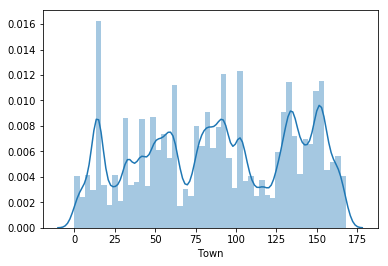

In [19]:
import seaborn as sns
sales = X['Town']
sns.distplot(sales);
print(townLabels)
print(mappedTownLabels)
# create output matrix to show a legend of the cities. 

property type  ['Vacant Land' 'Vacant Land' 'Residential' ... 'Vacant Land' 'Vacant Land'
 'Commercial']
property type mapped labels  [8 8 7 ... 8 8 3]


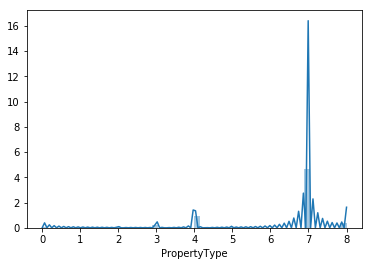

In [20]:
import seaborn as sns
sales = X['PropertyType']
sns.distplot(sales);

# Residential - Highest frequency; Then Vacand Land & (?) 

print("property type ", propertyTypeLabels)
print("property type mapped labels ", mappedPropertyTypeLabels)

property type  ['' '' 'Single Family' ... '' '' '']
property type mapped labels  [0 0 3 ... 0 0 0]


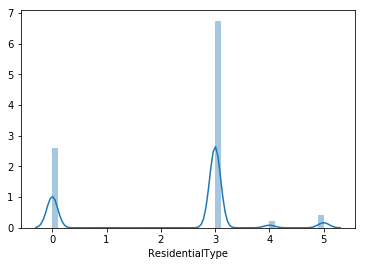

In [21]:
import seaborn as sns
sales = X['ResidentialType']
sns.distplot(sales);

#Single family - Highest frequency; Then 5? and 4?

print("property type ", residentialTypeLabels)
print("property type mapped labels ", mappedResidentialTypeLabels)

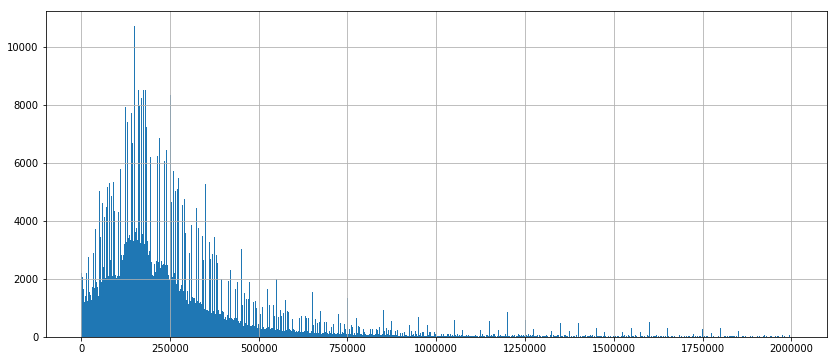

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 

bin_values = np.arange(start=-100, stop=2000000, step=2000) 
data['SaleAmount'].hist(bins=bin_values, figsize=[14,6]) 
plt.show()

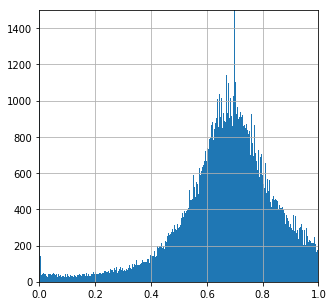

In [23]:
# Ratio is between 0.6 and 0.8
plt.axis([None, None, 0, 1500])
bin_values = np.arange(start=0, stop=1.5, step=0.001) 
data['SalesRatio'].hist(bins=bin_values, figsize=[5,5])
plt.show()

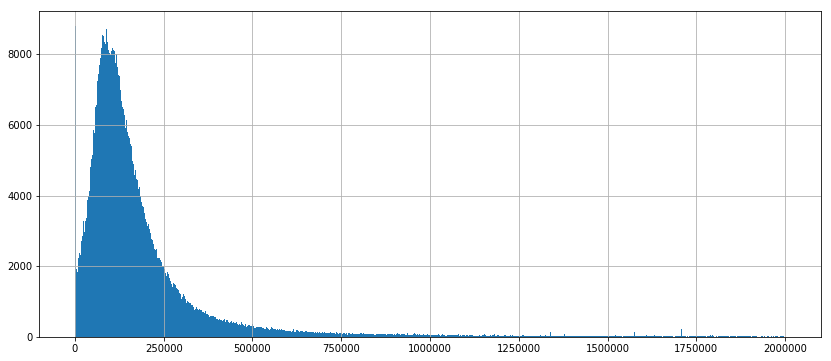

In [2]:
bin_values = np.arange(start=-100, stop=2000000, step=2000) 
data['AssessedValue'].hist(bins=bin_values, figsize=[14,6]) 
plt.show()